We will use the whole real-world data and the synthetic data’s training set as our training set,
and the synthetic data’s test set as our test set. 

Please note that the labels for the test set are not disclosed. 
To get our scores on the test set, we will submit our predictions to the Kaggle competition, which we got the synthetic data from.

<div class="list-group" id="list-tab" role="tablist">
<h2 class="list-group-item list-group-item-action active" data-toggle="list" style='background:blue; border:0; color:white' role="tab" aria-controls="home"><center>Quick navigation</center></h2>

* [0. Installation of libraries](#0)
* [1. Basic Data Overview](#1)
* [2. Analysis of data](#2)
* [3. EDA](#3)
* [4. Classification models](#4)

<a id="0"></a>
<h2 style='background:blue; border:0; color:white'><center>0. Installation of libraries</center><h2>

In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')
import plotly 
import plotly.express as px
import plotly.express as ex
import plotly.graph_objs as go
import plotly.offline as pyo
from plotly.subplots import make_subplots
import plotly.figure_factory as ff
pyo.init_notebook_mode()
from imblearn.over_sampling import SMOTE
import scikitplot as skplt
from sklearn import preprocessing 

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn import linear_model 
from sklearn import tree 
from sklearn import ensemble 
from sklearn import metrics 

from sklearn.linear_model import LinearRegression,LogisticRegression
from sklearn.tree import DecisionTreeRegressor,DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
import os

from sklearn.metrics import classification_report,confusion_matrix,f1_score
import warnings
warnings.filterwarnings('ignore')

plt.rc('figure',figsize=(17,13))
sns.set_context('paper',font_scale=2)

def set_seed(seed=31415):
    np.random.seed(seed)
    os.environ['PYTHONHASHSEED'] = str(seed)
    os.environ['TF_DETERMINISTIC_OPS'] = '1'
set_seed()

<a id="1"></a>
<h2 style='background:blue; border:0; color:white'><center>1. Basic Data Overview</center><h2>

In [3]:
s_data = pd.read_csv('/kaggle/input/stroke-prediction-dataset/healthcare-dataset-stroke-data.csv')
display(s_data.head(3))
print(s_data.info())

id  gender   age  hypertension  heart_disease ever_married  \
0   9046    Male  67.0             0              1          Yes   
1  51676  Female  61.0             0              0          Yes   
2  31112    Male  80.0             0              1          Yes   

       work_type Residence_type  avg_glucose_level   bmi   smoking_status  \
0        Private          Urban             228.69  36.6  formerly smoked   
1  Self-employed          Rural             202.21   NaN     never smoked   
2        Private          Rural             105.92  32.5     never smoked   

   stroke  
0       1  
1       1  
2       1

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB
None


In [4]:
train = pd.read_csv('/kaggle/input/playground-series-s3e2/train.csv')
display(train.head())
print(train.info())

id  gender   age  hypertension  heart_disease ever_married work_type  \
0   0    Male  28.0             0              0          Yes   Private   
1   1    Male  33.0             0              0          Yes   Private   
2   2  Female  42.0             0              0          Yes   Private   
3   3    Male  56.0             0              0          Yes   Private   
4   4  Female  24.0             0              0           No   Private   

  Residence_type  avg_glucose_level   bmi   smoking_status  stroke  
0          Urban              79.53  31.1     never smoked       0  
1          Rural              78.44  23.9  formerly smoked       0  
2          Rural             103.00  40.3          Unknown       0  
3          Urban              64.87  28.8     never smoked       0  
4          Rural              73.36  28.8     never smoked       0

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15304 entries, 0 to 15303
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 15304 non-null  int64  
 1   gender             15304 non-null  object 
 2   age                15304 non-null  float64
 3   hypertension       15304 non-null  int64  
 4   heart_disease      15304 non-null  int64  
 5   ever_married       15304 non-null  object 
 6   work_type          15304 non-null  object 
 7   Residence_type     15304 non-null  object 
 8   avg_glucose_level  15304 non-null  float64
 9   bmi                15304 non-null  float64
 10  smoking_status     15304 non-null  object 
 11  stroke             15304 non-null  int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 1.4+ MB
None


In [5]:
test= pd.read_csv('/kaggle/input/playground-series-s3e2/test.csv')
display(test.head())
print(test.info())

id  gender   age  hypertension  heart_disease ever_married work_type  \
0  15304  Female  57.0             0              0          Yes   Private   
1  15305    Male  70.0             1              0          Yes   Private   
2  15306  Female   5.0             0              0           No  children   
3  15307  Female  56.0             0              0          Yes  Govt_job   
4  15308    Male  32.0             0              0          Yes   Private   

  Residence_type  avg_glucose_level   bmi smoking_status  
0          Rural              82.54  33.4        Unknown  
1          Urban              72.06  28.5        Unknown  
2          Urban             103.72  19.5        Unknown  
3          Urban              69.24  41.4         smokes  
4          Rural             111.15  30.1         smokes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10204 entries, 0 to 10203
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 10204 non-null  int64  
 1   gender             10204 non-null  object 
 2   age                10204 non-null  float64
 3   hypertension       10204 non-null  int64  
 4   heart_disease      10204 non-null  int64  
 5   ever_married       10204 non-null  object 
 6   work_type          10204 non-null  object 
 7   Residence_type     10204 non-null  object 
 8   avg_glucose_level  10204 non-null  float64
 9   bmi                10204 non-null  float64
 10  smoking_status     10204 non-null  object 
dtypes: float64(3), int64(3), object(5)
memory usage: 877.0+ KB
None


In [6]:
sample_submission = pd.read_csv('/kaggle/input/playground-series-s3e2/sample_submission.csv')
sample_submission.head()

id    stroke
0  15304  0.041296
1  15305  0.041296
2  15306  0.041296
3  15307  0.041296
4  15308  0.041296

In [7]:
train_df = pd.concat([s_data,train], 
                     axis = 0, 
                     join = 'outer', 
                     ignore_index = True
                    ).drop_duplicates(ignore_index = True)
display(train_df.head())
print(train_df.info())

id  gender   age  hypertension  heart_disease ever_married  \
0   9046    Male  67.0             0              1          Yes   
1  51676  Female  61.0             0              0          Yes   
2  31112    Male  80.0             0              1          Yes   
3  60182  Female  49.0             0              0          Yes   
4   1665  Female  79.0             1              0          Yes   

       work_type Residence_type  avg_glucose_level   bmi   smoking_status  \
0        Private          Urban             228.69  36.6  formerly smoked   
1  Self-employed          Rural             202.21   NaN     never smoked   
2        Private          Rural             105.92  32.5     never smoked   
3        Private          Urban             171.23  34.4           smokes   
4  Self-employed          Rural             174.12  24.0     never smoked   

   stroke  
0       1  
1       1  
2       1  
3       1  
4       1

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20414 entries, 0 to 20413
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 20414 non-null  int64  
 1   gender             20414 non-null  object 
 2   age                20414 non-null  float64
 3   hypertension       20414 non-null  int64  
 4   heart_disease      20414 non-null  int64  
 5   ever_married       20414 non-null  object 
 6   work_type          20414 non-null  object 
 7   Residence_type     20414 non-null  object 
 8   avg_glucose_level  20414 non-null  float64
 9   bmi                20213 non-null  float64
 10  smoking_status     20414 non-null  object 
 11  stroke             20414 non-null  int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 1.9+ MB
None


In [8]:
train_df.describe()

id           age  hypertension  heart_disease  \
count  20414.000000  20414.000000  20414.000000   20414.000000   
mean   14877.273636     41.870510      0.061673       0.031008   
std    16825.306948     21.756482      0.240567       0.173344   
min        0.000000      0.080000      0.000000       0.000000   
25%     4766.250000     25.000000      0.000000       0.000000   
50%     9511.500000     43.000000      0.000000       0.000000   
75%    14279.750000     58.000000      0.000000       0.000000   
max    72940.000000     82.000000      1.000000       1.000000   

       avg_glucose_level           bmi        stroke  
count       20414.000000  20213.000000  20414.000000  
mean           93.322256     28.302280      0.043157  
std            32.476351      7.021765      0.203215  
min            55.120000     10.300000      0.000000  
25%            75.220000     23.500000      0.000000  
50%            86.250000     27.700000      0.000000  
75%            99.730000     32.200000      0.000000  
max           271.740000     97.600000      1.000000

<Figure size 1224x936 with 0 Axes>

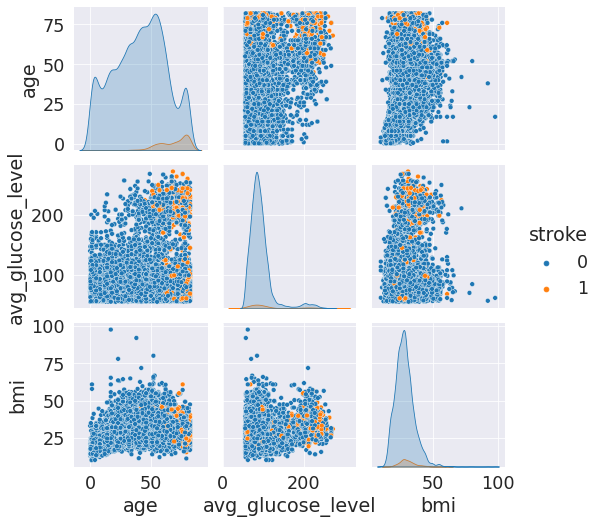

In [9]:
to_plot = ["age", "avg_glucose_level", "bmi", 'stroke']
plt.figure()
sns.pairplot(train_df[to_plot], hue= "stroke")
plt.show()

<a id="2"></a>
<h2 style='background:blue; border:0; color:white'><center>2. Analysis of data</center><h2>

In [10]:
#delete id (no information for model)
train_df.drop('id', axis = 1, inplace = True)

In [11]:
#Work with null in BMI
train_df = train_df.fillna({'bmi': train_df['bmi'].median()})

In [12]:
#highly doubtful to have young individuals with such a high BMI and normal glucose level without stroke
# consider them as outliers
#susp_data = [train_df['bmi']>75]

In [13]:
#delete suspicious data
train_df = train_df[(train_df['bmi']<75)]
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20410 entries, 0 to 20413
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             20410 non-null  object 
 1   age                20410 non-null  float64
 2   hypertension       20410 non-null  int64  
 3   heart_disease      20410 non-null  int64  
 4   ever_married       20410 non-null  object 
 5   work_type          20410 non-null  object 
 6   Residence_type     20410 non-null  object 
 7   avg_glucose_level  20410 non-null  float64
 8   bmi                20410 non-null  float64
 9   smoking_status     20410 non-null  object 
 10  stroke             20410 non-null  int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 1.9+ MB


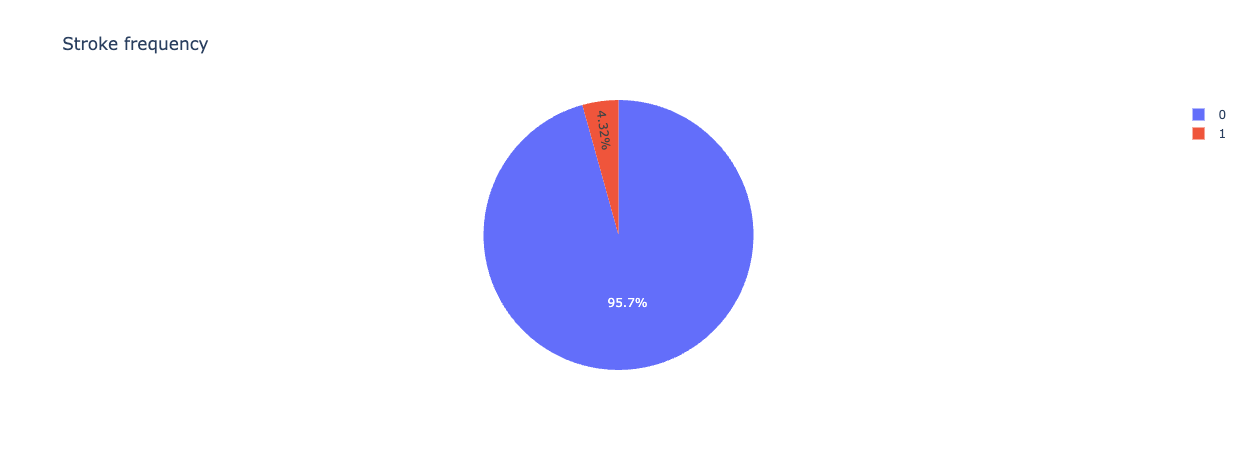

In [14]:
fig = px.pie(train_df,  
             names='stroke', 
             title='Stroke frequency')
fig.show()

In [15]:
types = train_df.dtypes
cat_features1 = list(types[(types == 'object')].index)
cat_features2 = list(types[(types == 'int64')].index)
num_features = list(types[(types == 'float64')].index)
print(cat_features1,cat_features2 , num_features)

['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status'] ['hypertension', 'heart_disease', 'stroke'] ['age', 'avg_glucose_level', 'bmi']


In [16]:
cat_features1.append('stroke')
n = len(cat_features1) 

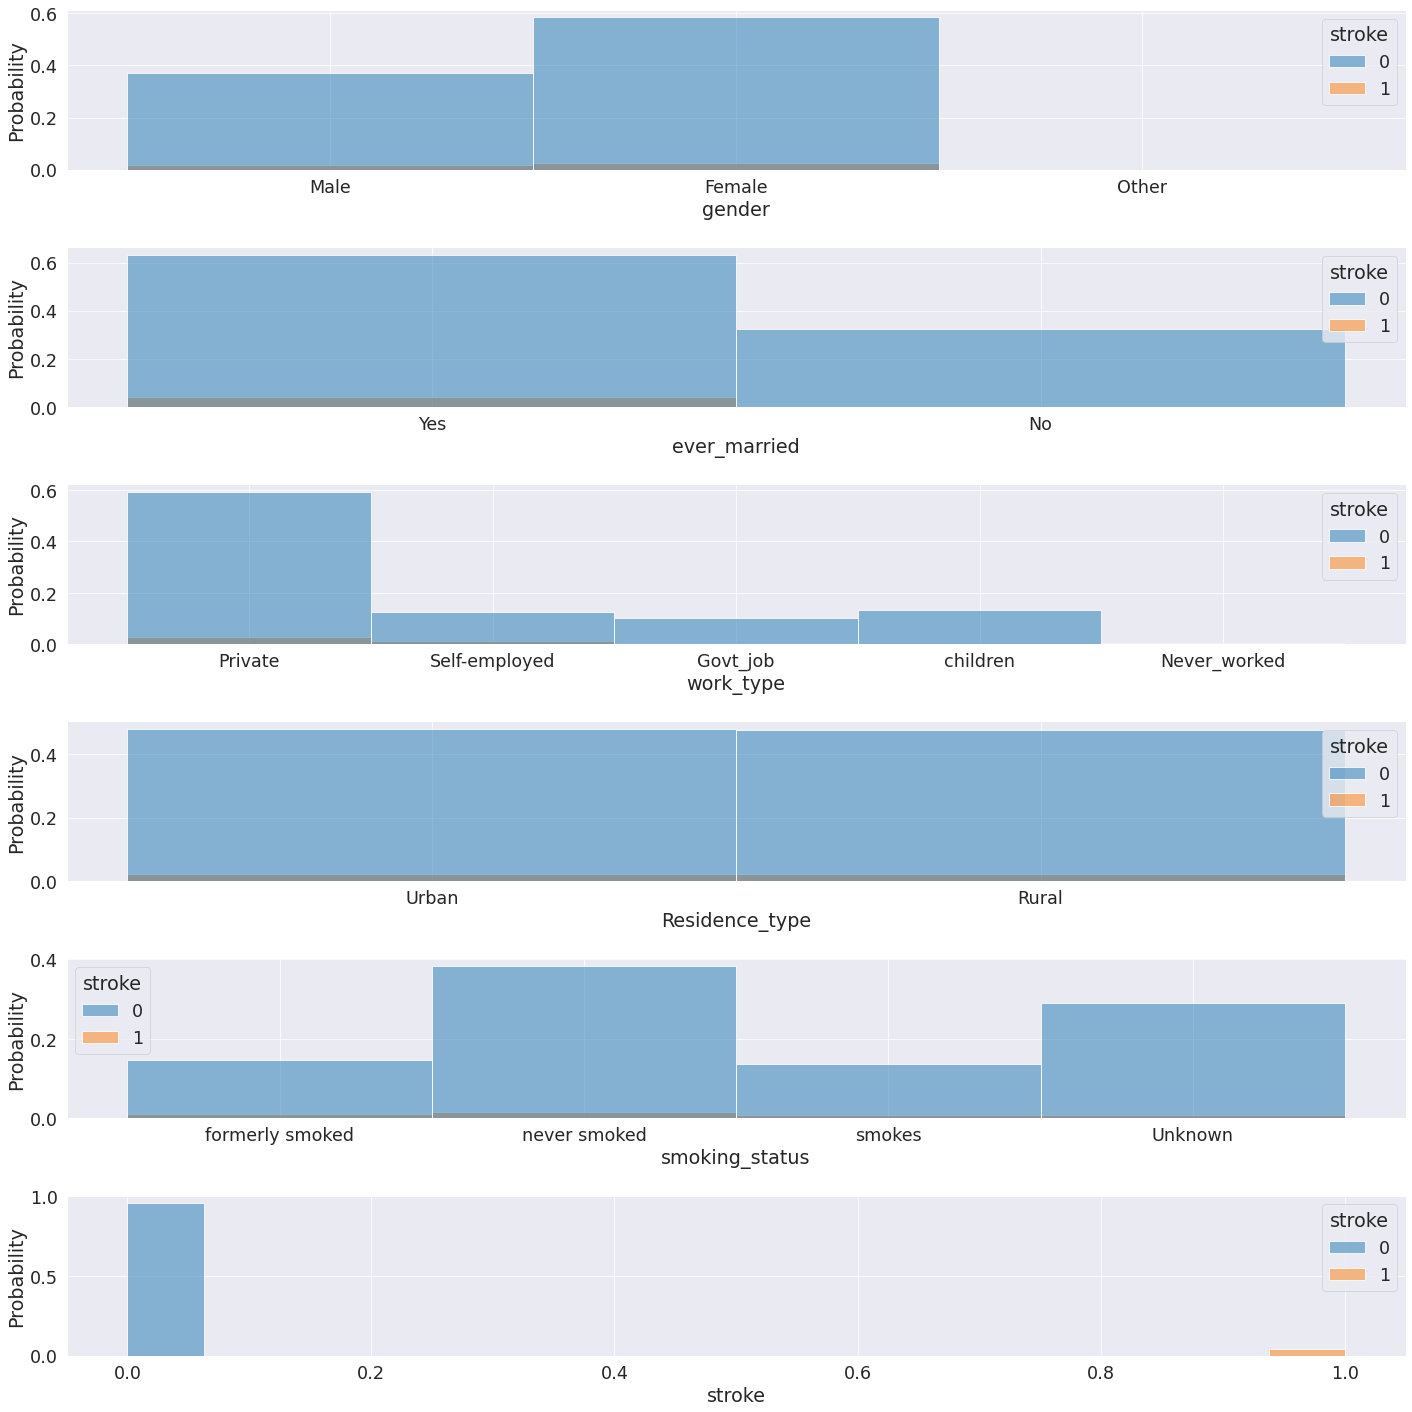

In [17]:
fig, axes = plt.subplots(n, 1, figsize=(20, 20))
for i, feature in enumerate(cat_features1):
    fig = sns.histplot(data=train_df, 
                       hue='stroke', 
                       x= feature,
                       stat='probability',
                       ax = axes[i])
plt.tight_layout()

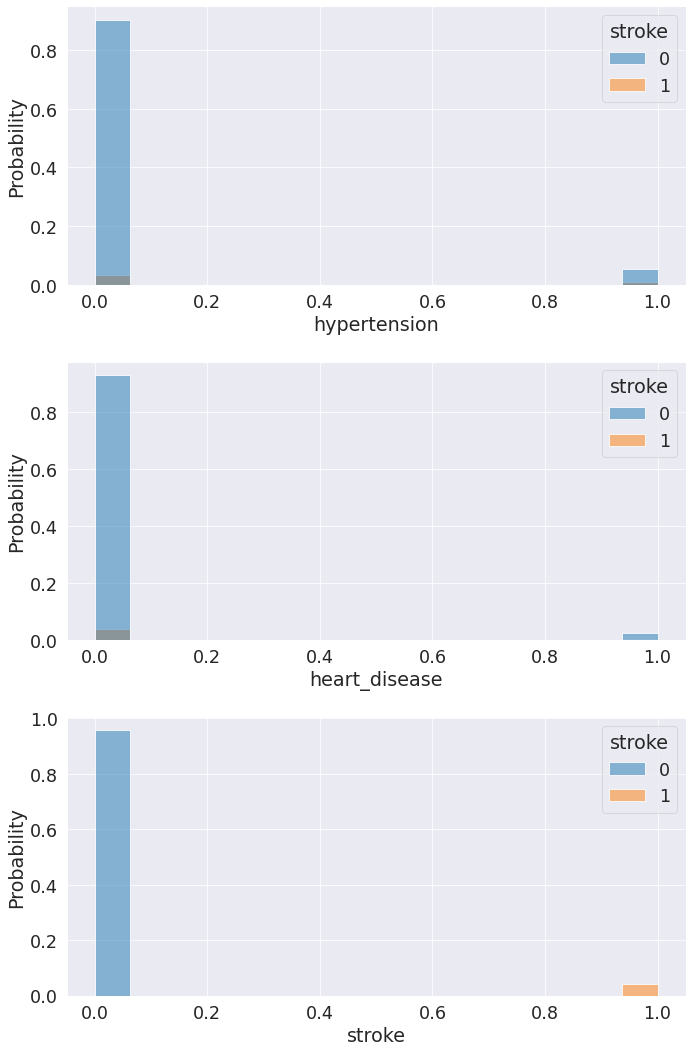

In [18]:
n = len(cat_features2) 
fig, axes = plt.subplots(n, 1, figsize=(10, 15))
for i, feature in enumerate(cat_features2):
    fig = sns.histplot(data=train_df, 
                       hue='stroke', 
                       x= feature, 
                       stat='probability',
                       ax = axes[i])
plt.tight_layout()

In [19]:
num_features.append('stroke')
n = len(num_features) 

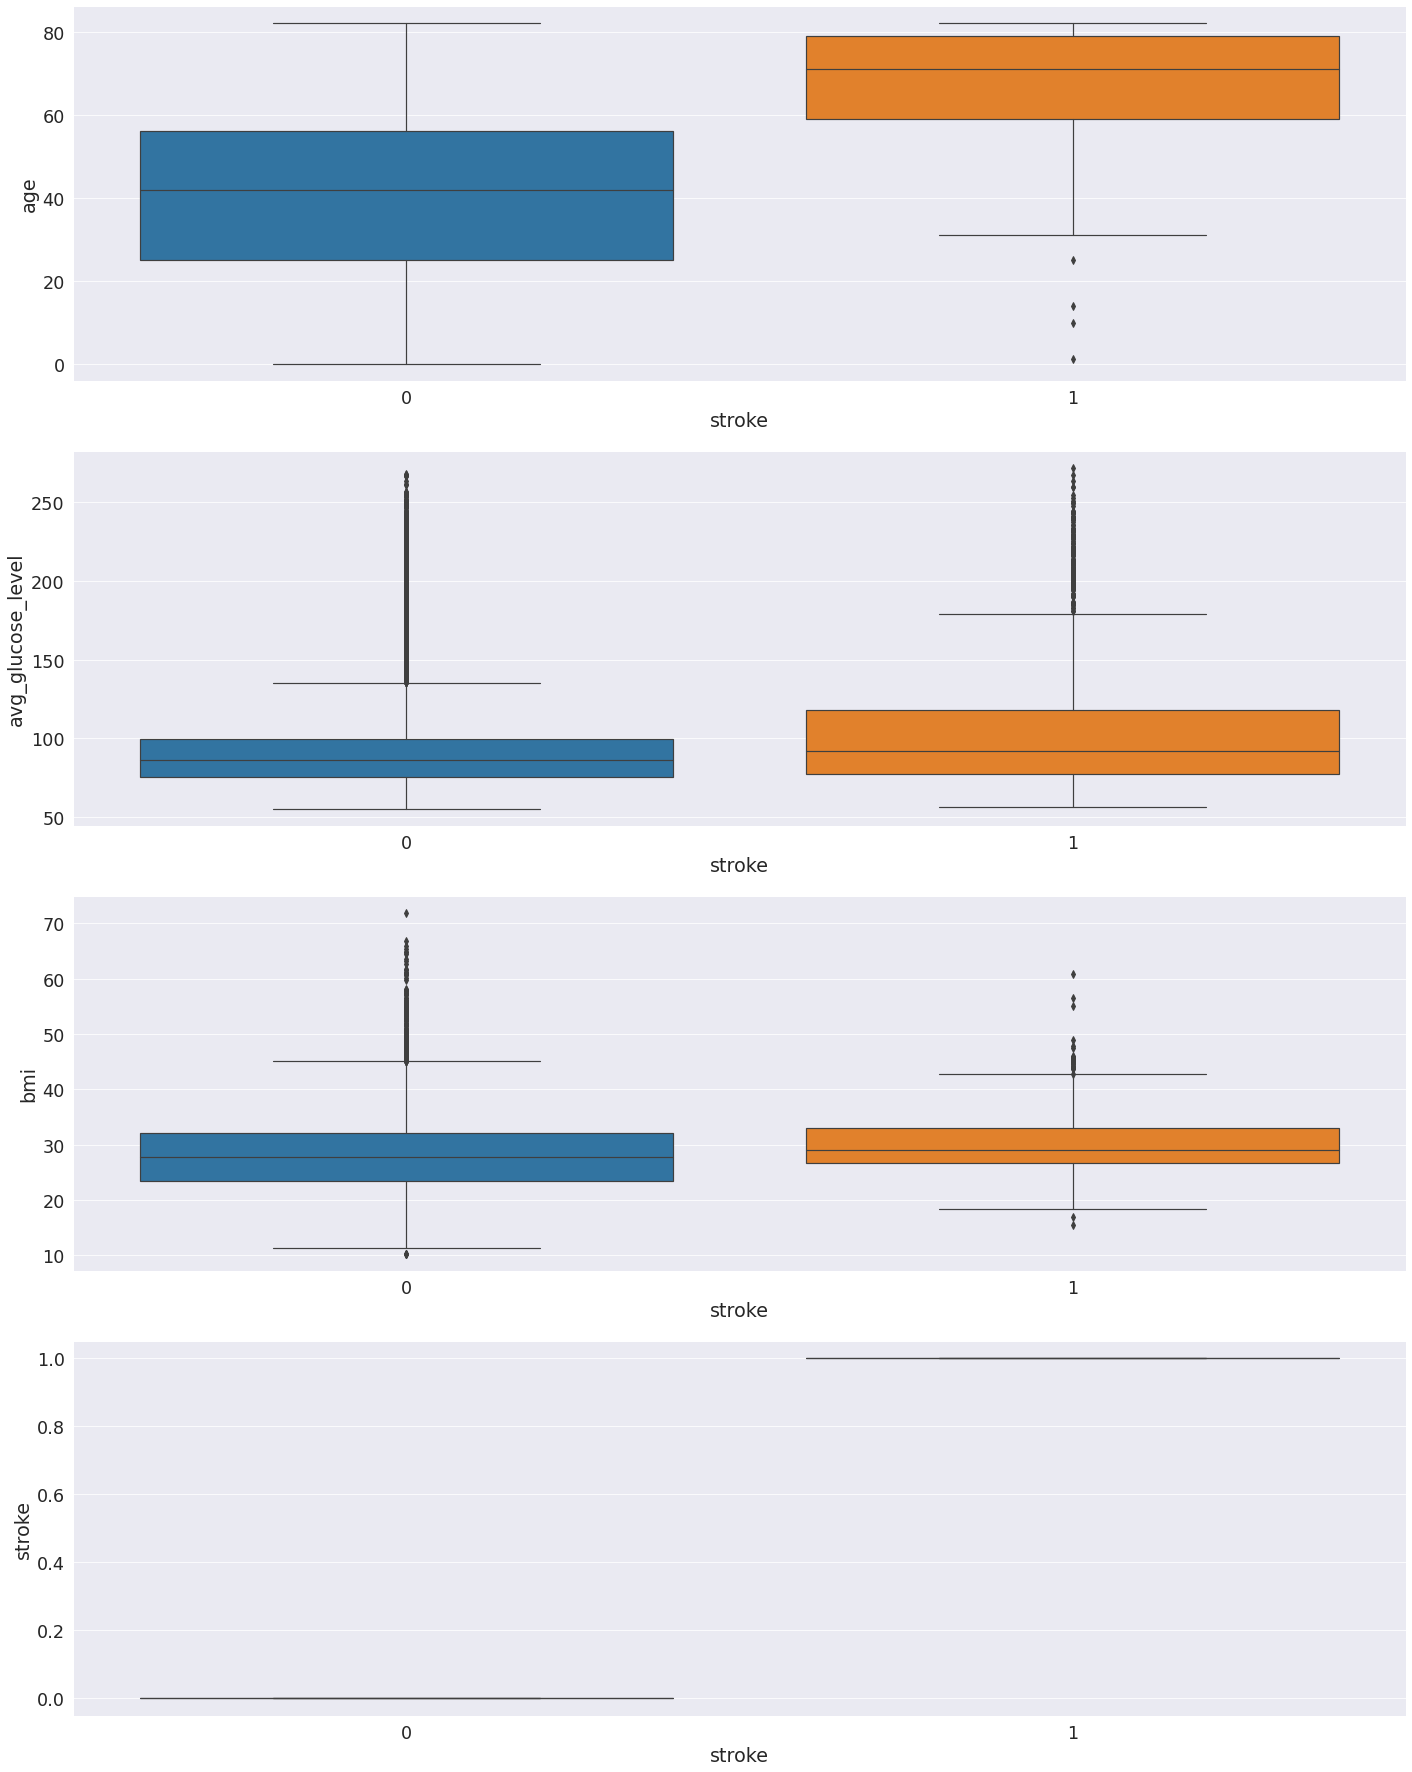

In [20]:
fig, axes = plt.subplots(n, 1, figsize=(20, 25))
for i, feature in enumerate(num_features):
    fig = sns.boxplot(data=train_df,  
                       y= feature, 
                      x = 'stroke',
                       ax = axes[i])
plt.tight_layout()

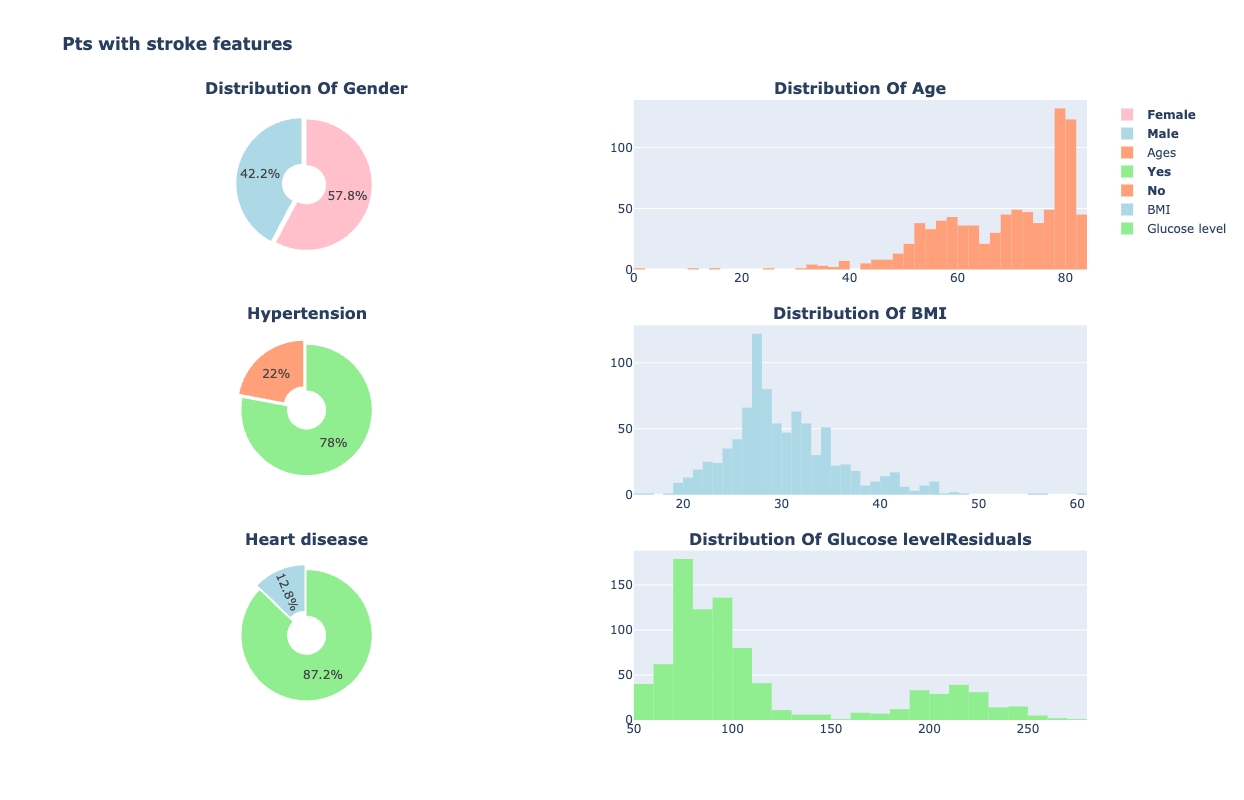

In [21]:
#Study of patients with stroke
stroke = train_df[train_df['stroke']==1]
fig = make_subplots(
    rows=3, cols=2,
    vertical_spacing=0.09,
    specs=[[{"type": "pie"}       ,{"type": "histogram"}] ,
           [{"type": "pie"}       ,{"type": "histogram"}] ,    
           [{"type": "pie"}       ,{"type": "histogram"}]
          ],
    subplot_titles=('<b>Distribution Of Gender<b>','<b>Distribution Of Age<b>',
                    '<b>Hypertension<b>','<b>Distribution Of BMI<b>',
                    '<b>Heart disease<b>', '<b>Distribution Of Glucose level<b>'
                    'Residuals')
)
fig.add_trace(
    go.Pie(values=stroke.gender.value_counts().values,
           labels=['<b>Female<b>','<b>Male<b>','<b>Other<b>'],
           hole=0.3,pull=[0,0.08,0.3],
           marker_colors=['pink','lightblue','lightgreen'],
           textposition='inside'),
    row=1, col=1
)

fig.add_trace(
    go.Histogram(
        x=stroke.age,
        marker= dict(color='lightsalmon'),
        name='Ages'
    ),
    row=1, col=2
)

fig.add_trace(
    go.Pie(values=stroke.hypertension.value_counts().values,
           labels=['<b>Yes<b>','<b>No<b>'],
           hole=0.3,pull=[0,0.08,0.3],
           marker_colors=['lightgreen','lightsalmon'],
           textposition='inside'),
    row=2, col=1
)
fig.add_trace(
    go.Histogram(
        x=stroke.bmi,
        marker= dict(color='lightblue'),
        name='BMI'       
    ),
    row=2, col=2
)
fig.add_trace(
    go.Pie(values=stroke.heart_disease.value_counts().values,
           labels=['<b>Yes<b>','<b>No<b>'],
           hole=0.3,pull=[0,0.08,0.3],
           marker_colors=['lightgreen','lightblue'],
           textposition='inside'),
    row=3, col=1
)
fig.add_trace(
    go.Histogram(
        x=stroke.avg_glucose_level,
        marker= dict(color='lightgreen'),
        name='Glucose level'
    ),
    row=3, col=2
)
fig.update_layout(
    height=800,
    showlegend=True,
    title_text="<b>Pts with stroke features<b>",
)

fig.show()

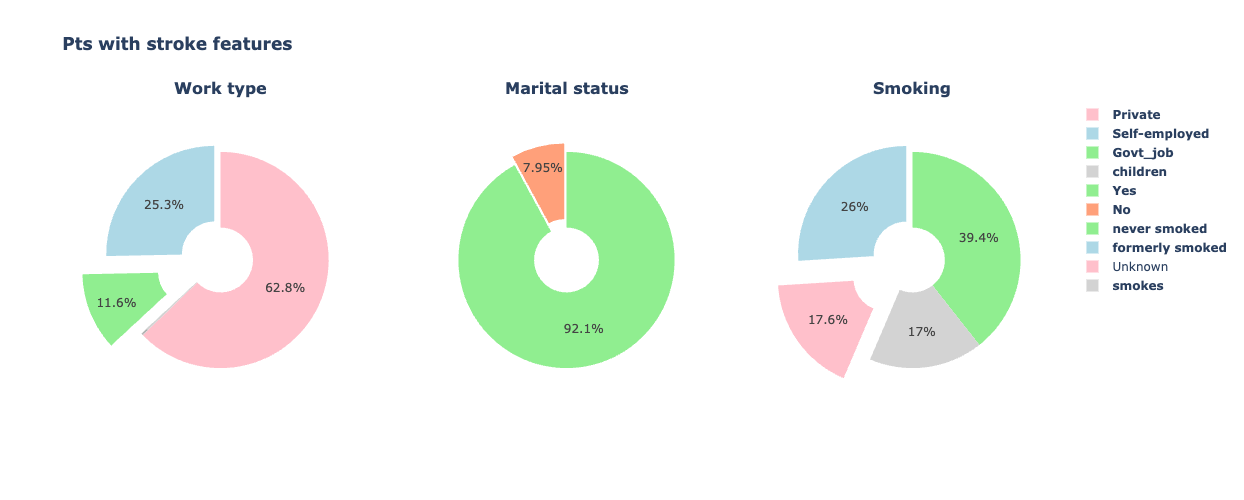

In [22]:
fig = make_subplots(
    rows=1, cols=3,
    vertical_spacing=0.09,
    specs=[[{"type": "pie"}, {"type": "pie"},{"type": "pie"}]
          ],
    subplot_titles=('<b>Work type<b>','<b>Marital status<b>',
                    '<b>Smoking<b>','Residuals')
)

fig.add_trace(
    go.Pie(values=stroke.work_type.value_counts().values,
           labels=['<b>Private<b>','<b>Self-employed<b>',
                  '<b>Govt_job<b>', '<b>children<b>'],
           hole=0.3,pull=[0,0.08,0.3],
           marker_colors=['pink','lightblue', 'lightgreen', 'lightgrey'],
           textposition='inside'),
    row=1, col=1
)

fig.add_trace(
    go.Pie(values=stroke.ever_married.value_counts().values,
           labels=['<b>Yes<b>','<b>No<b>'],
           hole=0.3,pull=[0,0.08,0.3],
           marker_colors=['lightgreen','lightsalmon'],
           textposition='inside'),
    row=1, col=2
)

fig.add_trace(
    go.Pie(values=stroke.smoking_status.value_counts().values,
           labels=['<b>never smoked<b>','<b>formerly smoked<b>',
                  'Unknown ','<b>smokes<b>'],
           hole=0.3,pull=[0,0.08,0.3],
           marker_colors=['lightgreen','lightblue', 'pink', 'lightgrey'],
           textposition='inside'),
    row=1, col=3
)

fig.update_layout(
    height=500,
    showlegend=True,
    title_text="<b>Pts with stroke features<b>",
)

fig.show()

<a id="3"></a>
<h2 style='background:blue; border:0; color:white'><center>3. EDA</center><h2>

# Data transformation

In [23]:
from sklearn.preprocessing import LabelBinarizer
transformer = preprocessing.LabelBinarizer()
train_df['gender'] = transformer.fit_transform(train_df.gender)
train_df['ever_married'] = transformer.fit_transform(train_df.ever_married)
train_df

gender   age  hypertension  heart_disease  ever_married      work_type  \
0           0  67.0             0              1             1        Private   
1           1  61.0             0              0             1  Self-employed   
2           0  80.0             0              1             1        Private   
3           1  49.0             0              0             1        Private   
4           1  79.0             1              0             1  Self-employed   
...       ...   ...           ...            ...           ...            ...   
20409       1  22.0             0              0             0       Govt_job   
20410       1  46.0             1              0             1        Private   
20411       1  75.0             0              0             1  Self-employed   
20412       0  46.0             0              0             1        Private   
20413       1  14.0             0              0             0        Private   

      Residence_type  avg_glucose_level   bmi   smoking_status  stroke  
0              Urban             228.69  36.6  formerly smoked       1  
1              Rural             202.21  27.7     never smoked       1  
2              Rural             105.92  32.5     never smoked       1  
3              Urban             171.23  34.4           smokes       1  
4              Rural             174.12  24.0     never smoked       1  
...              ...                ...   ...              ...     ...  
20409          Urban              72.63  19.5     never smoked       0  
20410          Urban             101.19  32.1     never smoked       0  
20411          Urban              87.69  26.2     never smoked       0  
20412          Rural             101.13  22.5          Unknown       0  
20413          Rural              85.12  24.7     never smoked       0  

[20410 rows x 11 columns]

In [24]:
cols = ['work_type','Residence_type','smoking_status']
dummie = pd.get_dummies(train_df[cols], drop_first=True)
df_coded = pd.concat([train_df, dummie], axis=1)
df_coded.drop(cols, axis=1, inplace=True)

In [25]:
df_coded[df_coded['stroke'].isna()==True]

Empty DataFrame
Columns: [gender, age, hypertension, heart_disease, ever_married, avg_glucose_level, bmi, stroke, work_type_Never_worked, work_type_Private, work_type_Self-employed, work_type_children, Residence_type_Urban, smoking_status_formerly smoked, smoking_status_never smoked, smoking_status_smokes]
Index: []

In [26]:
display(df_coded.head(2))
print(df_coded.info())

gender   age  hypertension  heart_disease  ever_married  avg_glucose_level  \
0       0  67.0             0              1             1             228.69   
1       1  61.0             0              0             1             202.21   

    bmi  stroke  work_type_Never_worked  work_type_Private  \
0  36.6       1                       0                  1   
1  27.7       1                       0                  0   

   work_type_Self-employed  work_type_children  Residence_type_Urban  \
0                        0                   0                     1   
1                        1                   0                     0   

   smoking_status_formerly smoked  smoking_status_never smoked  \
0                               1                            0   
1                               0                            1   

   smoking_status_smokes  
0                      0  
1                      0

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20410 entries, 0 to 20413
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   gender                          20410 non-null  int64  
 1   age                             20410 non-null  float64
 2   hypertension                    20410 non-null  int64  
 3   heart_disease                   20410 non-null  int64  
 4   ever_married                    20410 non-null  int64  
 5   avg_glucose_level               20410 non-null  float64
 6   bmi                             20410 non-null  float64
 7   stroke                          20410 non-null  int64  
 8   work_type_Never_worked          20410 non-null  uint8  
 9   work_type_Private               20410 non-null  uint8  
 10  work_type_Self-employed         20410 non-null  uint8  
 11  work_type_children              20410 non-null  uint8  
 12  Residence_type_Urban            

# Analysis of significance of features

<function matplotlib.pyplot.show(close=None, block=None)>

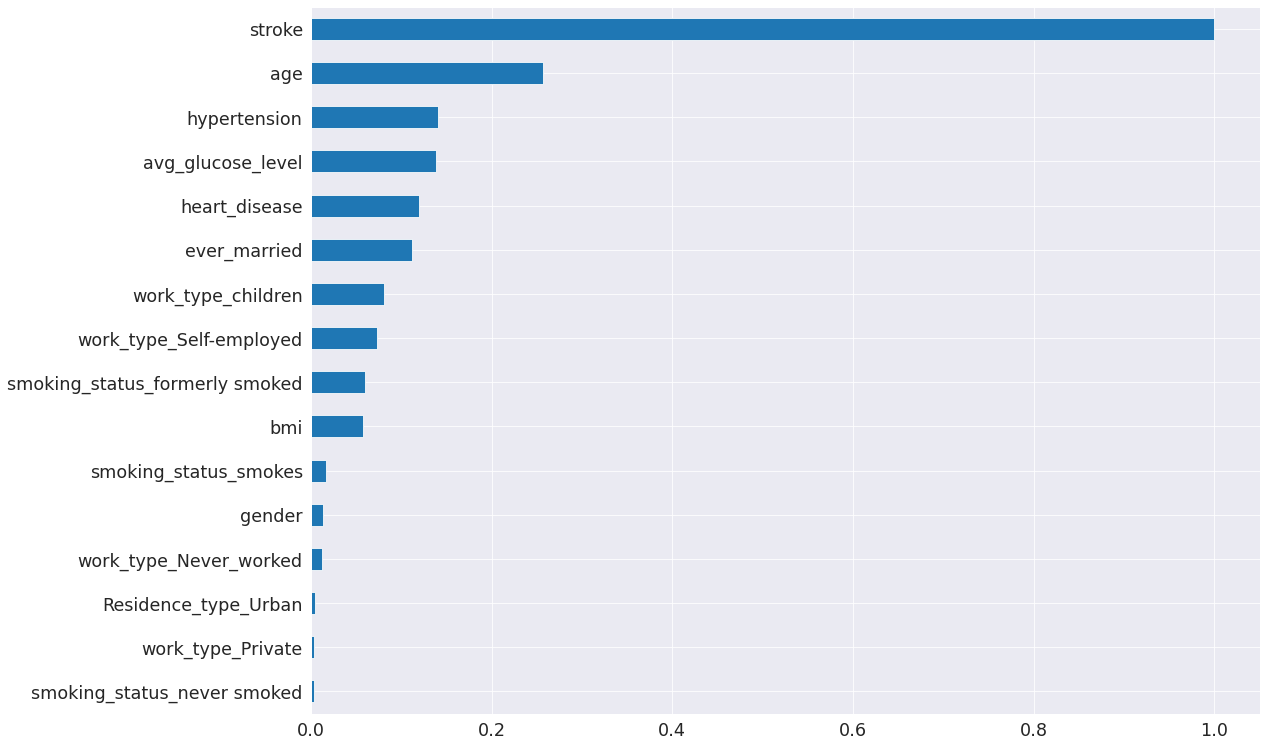

In [27]:
df_coded.corr()['stroke'].apply(lambda x: abs(x)).sort_values().plot.barh()
plt.show

<AxesSubplot:>

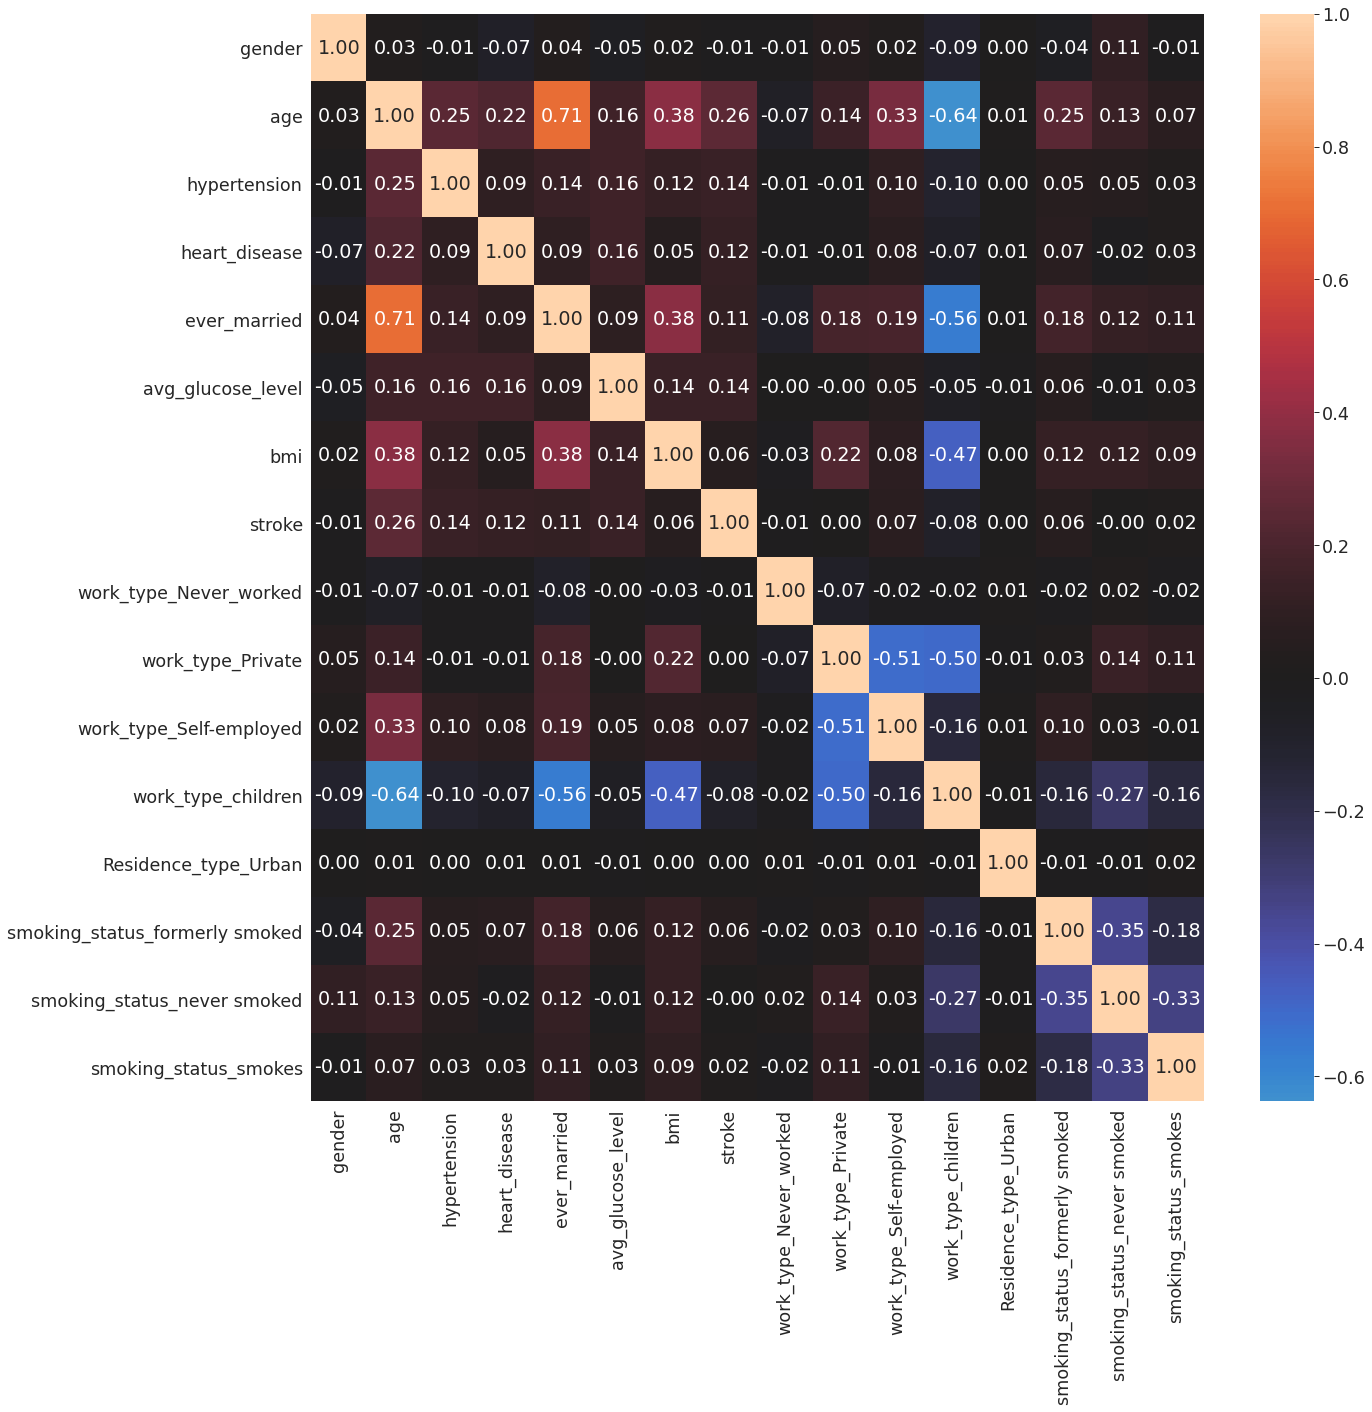

In [28]:
plt.figure(figsize=(20,20))  
sns.heatmap(df_coded.corr(),fmt='.2f',annot=True, center=0)

<a id="4"></a>
<h2 style='background:blue; border:0; color:white'><center>4. Classification models</center><h2>

# Preparation of data

In [29]:
from imblearn.over_sampling import SMOTE

In [30]:
X = df_coded.drop(['stroke'], axis=1)
y = df_coded['stroke']

In [31]:
sm = SMOTE(random_state=2)
X_s, y_s = sm.fit_resample(X, y)

print('Train shape before oversampling:', X.shape) 
print('Class balance before oversampling: \n', y.value_counts(), sep='')
print('-'*40)
print('Train shape after oversampling:', X_s.shape)
print('Class balance after oversampling: \n', y_s.value_counts(), sep='')

Train shape before oversampling: (20410, 15)
Class balance before oversampling: 
0    19529
1      881
Name: stroke, dtype: int64
----------------------------------------
Train shape after oversampling: (39058, 15)
Class balance after oversampling: 
0    19529
1    19529
Name: stroke, dtype: int64


In [32]:
X_train, X_valid, y_train, y_valid = train_test_split(
    X_s, y_s, stratify=y_s, random_state = 42, test_size = 0.33
)

In [33]:
#normalization
scaler = preprocessing.MinMaxScaler()
scaler.fit(X_train)
X_train_scaled = pd.DataFrame(scaler.transform(X_train), columns= X_train.columns)
X_valid_scaled = pd.DataFrame(scaler.transform(X_valid), columns=X_valid.columns)

# Logistic regression

In [34]:
# Logistic regression
log_reg = linear_model.LogisticRegression(random_state=42, solver = 'sag', max_iter=1000)

log_reg.fit(X_train_scaled, y_train)

y_pred_train = log_reg.predict(X_train_scaled)
y_pred_valid = log_reg.predict(X_valid_scaled)
print('Train df:',metrics.classification_report(y_train, y_pred_train))
print('Valid df:',metrics.classification_report(y_valid, y_pred_valid))

Train df:               precision    recall  f1-score   support

           0       0.88      0.87      0.88     13084
           1       0.87      0.88      0.88     13084

    accuracy                           0.88     26168
   macro avg       0.88      0.88      0.88     26168
weighted avg       0.88      0.88      0.88     26168

Valid df:               precision    recall  f1-score   support

           0       0.88      0.87      0.87      6445
           1       0.87      0.88      0.87      6445

    accuracy                           0.87     12890
   macro avg       0.87      0.87      0.87     12890
weighted avg       0.87      0.87      0.87     12890



In [38]:
# Decision Tree
dt_clf = tree.DecisionTreeClassifier(
    criterion='entropy', 
    random_state=42,
    max_depth=11
)

dt_clf.fit(X_train_scaled, y_train)
y_pred_train = dt_clf.predict(X_train_scaled)
y_pred_valid = dt_clf.predict(X_valid_scaled)
print(metrics.classification_report(y_train, y_pred_train))
print(metrics.classification_report(y_valid, y_pred_valid))

              precision    recall  f1-score   support

           0       0.95      0.91      0.93     13084
           1       0.91      0.95      0.93     13084

    accuracy                           0.93     26168
   macro avg       0.93      0.93      0.93     26168
weighted avg       0.93      0.93      0.93     26168

              precision    recall  f1-score   support

           0       0.92      0.87      0.89      6445
           1       0.88      0.92      0.90      6445

    accuracy                           0.90     12890
   macro avg       0.90      0.90      0.90     12890
weighted avg       0.90      0.90      0.90     12890



# Ensambles

In [39]:
# Random forest
rf_clf_full = ensemble.RandomForestClassifier(
    n_estimators=100, 
    criterion='gini',
    max_depth=10, 
    max_features='sqrt', 
    random_state=42, 
    min_samples_leaf = 5
)

rf_clf_full.fit(X_train_scaled, y_train)


y_pred_valid = rf_clf_full.predict(X_valid_scaled)

print(metrics.classification_report(y_valid, y_pred_valid))

              precision    recall  f1-score   support

           0       0.91      0.88      0.90      6445
           1       0.88      0.92      0.90      6445

    accuracy                           0.90     12890
   macro avg       0.90      0.90      0.90     12890
weighted avg       0.90      0.90      0.90     12890



In [40]:
# Optuna optimization
import optuna
random_state = 42
def optuna_rf(trial):
  n_estimators = trial.suggest_int('n_estimators', 100, 200, 1)
  max_depth = trial.suggest_int('max_depth', 10, 30, 1)
  min_samples_leaf = trial.suggest_int('min_samples_leaf', 2, 10, 1)

  model = ensemble.RandomForestClassifier(n_estimators=n_estimators,
                                          max_depth=max_depth,
                                          min_samples_leaf=min_samples_leaf,
                                          random_state=random_state)
  model.fit(X_train_scaled, y_train)
  score = metrics.f1_score(y_train, model.predict(X_train_scaled))

  return score

study = optuna.create_study(study_name="RandomForestClassifier", direction="maximize")
study.optimize(optuna_rf, n_trials=20)

print("The best hyperparameters {}".format(study.best_params))
print("f1_score for train sample: {:.2f}".format(study.best_value))

[I 2023-05-18 17:19:48,949] A new study created in memory with name: RandomForestClassifier
[I 2023-05-18 17:19:55,136] Trial 0 finished with value: 0.9398655284430006 and parameters: {'n_estimators': 189, 'max_depth': 16, 'min_samples_leaf': 7}. Best is trial 0 with value: 0.9398655284430006.
[I 2023-05-18 17:20:01,171] Trial 1 finished with value: 0.9841172877214417 and parameters: {'n_estimators': 164, 'max_depth': 29, 'min_samples_leaf': 2}. Best is trial 1 with value: 0.9841172877214417.
[I 2023-05-18 17:20:04,892] Trial 2 finished with value: 0.9380250913611875 and parameters: {'n_estimators': 117, 'max_depth': 14, 'min_samples_leaf': 6}. Best is trial 1 with value: 0.9841172877214417.
[I 2023-05-18 17:20:09,469] Trial 3 finished with value: 0.951245283018868 and parameters: {'n_estimators': 133, 'max_depth': 15, 'min_samples_leaf': 4}. Best is trial 1 with value: 0.9841172877214417.
[I 2023-05-18 17:20:12,476] Trial 4 finished with value: 0.9205203398751787 and parameters: {'n_e

The best hyperparameters {'n_estimators': 162, 'max_depth': 26, 'min_samples_leaf': 2}
f1_score for train sample: 0.98


In [46]:
# metrics for valid sample
model = ensemble.RandomForestClassifier(**study.best_params,random_state=random_state, )
model.fit(X_train_scaled, y_train)
y_train_pred = model.predict(X_train_scaled)
y_valid_pred = model.predict(X_valid_scaled)

print(classification_report(y_train, y_pred_stack_train))
print(metrics.classification_report(y_valid, y_valid_pred))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99     13084
           1       1.00      0.99      0.99     13084

    accuracy                           0.99     26168
   macro avg       0.99      0.99      0.99     26168
weighted avg       0.99      0.99      0.99     26168

              precision    recall  f1-score   support

           0       0.95      0.94      0.95      6445
           1       0.94      0.96      0.95      6445

    accuracy                           0.95     12890
   macro avg       0.95      0.95      0.95     12890
weighted avg       0.95      0.95      0.95     12890



# Stacking

In [43]:
from sklearn.ensemble import StackingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression

estimators = [
    ('dt',  DecisionTreeClassifier(
        criterion='entropy', 
        random_state=42,
        max_depth=10)),
    ('rf_opt', RandomForestClassifier(
        **study.best_params,
        random_state=42)),
    ('log', LogisticRegression(
        random_state=42,
        solver = 'sag', 
        max_iter=1000
    ))
]


reg = ensemble.StackingClassifier(
    estimators=estimators,
    final_estimator=linear_model.LogisticRegression(
                                          random_state=42)
)

reg.fit(X_train_scaled, y_train)

StackingClassifier(estimators=[('dt',
                                DecisionTreeClassifier(criterion='entropy',
                                                       max_depth=10,
                                                       random_state=42)),
                               ('rf_opt',
                                RandomForestClassifier(max_depth=26,
                                                       min_samples_leaf=2,
                                                       n_estimators=162,
                                                       random_state=42)),
                               ('log',
                                LogisticRegression(max_iter=1000,
                                                   random_state=42,
                                                   solver='sag'))],
                   final_estimator=LogisticRegression(random_state=42))

In [45]:
y_pred_stack = reg.predict(X_valid_scaled)
y_pred_stack_train = reg.predict(X_train_scaled)
print(classification_report(y_train, y_pred_stack_train))
print(classification_report(y_valid, y_pred_stack))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99     13084
           1       1.00      0.99      0.99     13084

    accuracy                           0.99     26168
   macro avg       0.99      0.99      0.99     26168
weighted avg       0.99      0.99      0.99     26168

              precision    recall  f1-score   support

           0       0.95      0.95      0.95      6445
           1       0.95      0.95      0.95      6445

    accuracy                           0.95     12890
   macro avg       0.95      0.95      0.95     12890
weighted avg       0.95      0.95      0.95     12890



# Test data

In [36]:
#preprocessing of test data
test_id = test['id']
test_mod = test.drop('id', axis = 1)
cols = ['work_type','Residence_type','smoking_status']
dummie = pd.get_dummies(test_mod[cols], drop_first=True)
X_test = pd.concat([test_mod, dummie], axis=1)
X_test.drop(cols, axis=1, inplace=True)
X_test['gender'] = transformer.fit_transform(X_test.gender)
X_test['ever_married'] = transformer.fit_transform(X_test.ever_married)
X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns= X_test.columns)

In [37]:
y_pred_test = log_reg.predict(X_test_scaled)
proba_values = log_reg.predict_proba(X_test_scaled)
positive_class_proba = proba_values[:, 1]

submission_df = pd.DataFrame({'id': test_id, 'stroke': y_pred_test, 'probability': positive_class_proba})
submission_df

id  stroke  probability
0      15304       1     0.689866
1      15305       1     0.790558
2      15306       0     0.001664
3      15307       0     0.396299
4      15308       0     0.048697
...      ...     ...          ...
10199  25503       0     0.005071
10200  25504       0     0.431036
10201  25505       0     0.003377
10202  25506       0     0.012024
10203  25507       0     0.000905

[10204 rows x 3 columns]

In [48]:
y_pred_stack_test = reg.predict(X_test_scaled)
proba_values_2 = reg.predict_proba(X_test_scaled)
positive_class_proba_2 = proba_values[:, 1]

submission_df_2 = pd.DataFrame({'id': test_id, 'stroke': y_pred_stack_test, 'probability': positive_class_proba_2})
submission_df_2

id  stroke  probability
0      15304       0     0.022800
1      15305       1     0.792019
2      15306       0     0.009294
3      15307       0     0.034887
4      15308       0     0.016094
...      ...     ...          ...
10199  25503       0     0.009314
10200  25504       0     0.010512
10201  25505       0     0.009418
10202  25506       0     0.009304
10203  25507       0     0.010150

[10204 rows x 3 columns]

In [51]:
#comparison
comparison = submission_df.merge(right = submission_df_2, on = 'id', how = 'outer')

In [53]:
comparison.query('stroke_x != stroke_y')

id  stroke_x  probability_x  stroke_y  probability_y
0      15304         1       0.689866         0       0.022800
30     15334         1       0.634087         0       0.099155
43     15347         0       0.428309         1       0.510092
54     15358         1       0.545828         0       0.235977
56     15360         1       0.861407         0       0.008180
...      ...       ...            ...       ...            ...
10139  25443         1       0.785493         0       0.434764
10153  25457         1       0.679955         0       0.203064
10155  25459         1       0.562192         0       0.242327
10156  25460         0       0.191644         1       0.739420
10180  25484         1       0.639974         0       0.352301

[1028 rows x 5 columns]

In [54]:
print(metrics.classification_report(y_pred_stack_test, y_pred_test))

              precision    recall  f1-score   support

           0       0.99      0.90      0.94      9700
           1       0.30      0.79      0.44       504

    accuracy                           0.90     10204
   macro avg       0.65      0.85      0.69     10204
weighted avg       0.95      0.90      0.92     10204

